<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#MLflow-5-minute-Tracking-Quickstart" data-toc-modified-id="MLflow-5-minute-Tracking-Quickstart-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>MLflow 5 minute Tracking Quickstart</a></span><ul class="toc-item"><li><span><a href="#Set-the-MLflow-Tracking-URI" data-toc-modified-id="Set-the-MLflow-Tracking-URI-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Set the MLflow Tracking URI</a></span></li></ul></li><li><span><a href="#Load-training-data-and-train-a-simple-model" data-toc-modified-id="Load-training-data-and-train-a-simple-model-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load training data and train a simple model</a></span></li><li><span><a href="#Define-an-MLflow-Experiment" data-toc-modified-id="Define-an-MLflow-Experiment-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Define an MLflow Experiment</a></span></li><li><span><a href="#Log-the-model,-hyperparameters,-and-loss-metrics-to-MLflow." data-toc-modified-id="Log-the-model,-hyperparameters,-and-loss-metrics-to-MLflow.-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Log the model, hyperparameters, and loss metrics to MLflow.</a></span></li><li><span><a href="#Load-our-saved-model-as-a-Python-Function" data-toc-modified-id="Load-our-saved-model-as-a-Python-Function-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Load our saved model as a Python Function</a></span></li><li><span><a href="#Use-our-model-to-predict-the-iris-class-type-on-a-Pandas-DataFrame" data-toc-modified-id="Use-our-model-to-predict-the-iris-class-type-on-a-Pandas-DataFrame-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Use our model to predict the iris class type on a Pandas DataFrame</a></span></li><li><span><a href="#View-the-Run-in-the-MLflow-UI" data-toc-modified-id="View-the-Run-in-the-MLflow-UI-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>View the Run in the MLflow UI</a></span></li></ul></div>

## MLflow 5 minute Tracking Quickstart

This notebook demonstrates using a local MLflow Tracking Server to log, register, and then load a model as a generic Python Function (pyfunc) to perform inference on a Pandas DataFrame.

Throughout this notebook, we'll be using the MLflow fluent API to perform all interactions with the MLflow Tracking Server.

In [12]:
import mlflow
from mlflow.models import infer_signature

import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## Load training data and train a simple model

For our quickstart, we're going to be using the familiar iris dataset that is included in scikit-learn. Following the split of the data, we're going to train a simple logistic regression classifier on the training data and calculate some error metrics on our holdout test data. 

Note that the only MLflow-related activities in this portion are around the fact that we're using a `param` dictionary to supply our model's hyperparameters; this is to make logging these settings easier when we're ready to log our model and its associated metadata.

In [13]:
import numpy as np
mlflow.set_experiment("Zillow Test")
mlflow.autolog()

# Load the Iris dataset
#X, y = datasets.load_iris(return_X_y=True)
dataset = pd.read_csv('data/Housing.csv')
#X = dataset.sort_values(by='price').loc[:, 'area':'area']
#y = dataset.sort_values(by='price').loc[:, 'price':'price']
X = dataset[['area']]
y = dataset['price']
ln_X = np.log(X)
ln_Y = np.log(y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# Split the data into training and test sets
_X_train, _X_test, _y_train, _y_test = train_test_split(ln_X, ln_Y, test_size=0.5, random_state=0)

# Define the model hyperparameters
params = {}

# Train the model
lr = LinearRegression(**params)
lr.fit(X_train, y_train)

# Predict on the test set
y_pred = lr.predict(X_test)

# Train the model
_lr = LinearRegression(**params)
_lr.fit(_X_train, _y_train)

# Predict on the test set
_y_pred = _lr.predict(_X_test)

Traceback (most recent call last):
  File "c:\Users\georg\Documents\GitHub\.venv\lib\site-packages\mlflow\store\tracking\file_store.py", line 302, in search_experiments
    exp = self._get_experiment(exp_id, view_type)
  File "c:\Users\georg\Documents\GitHub\.venv\lib\site-packages\mlflow\store\tracking\file_store.py", line 395, in _get_experiment
    meta = FileStore._read_yaml(experiment_dir, FileStore.META_DATA_FILE_NAME)
  File "c:\Users\georg\Documents\GitHub\.venv\lib\site-packages\mlflow\store\tracking\file_store.py", line 1303, in _read_yaml
    return _read_helper(root, file_name, attempts_remaining=retries)
  File "c:\Users\georg\Documents\GitHub\.venv\lib\site-packages\mlflow\store\tracking\file_store.py", line 1296, in _read_helper
    result = read_yaml(root, file_name)
  File "c:\Users\georg\Documents\GitHub\.venv\lib\site-packages\mlflow\utils\file_utils.py", line 313, in read_yaml
    raise MissingConfigException(f"Yaml file '{file_path}' does not exist.")
mlflow.except

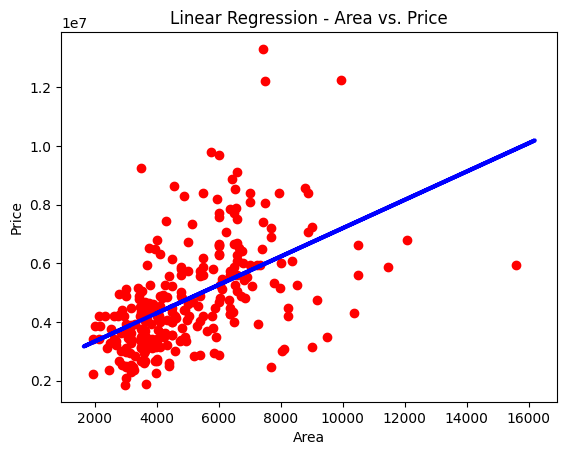

1222565.7502039731


In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
accuracy = mean_absolute_error(y_test, y_pred)
plt.scatter(X_train, y_train, color='red')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Linear Regression - Area vs. Price')
plt.show()
print(accuracy)

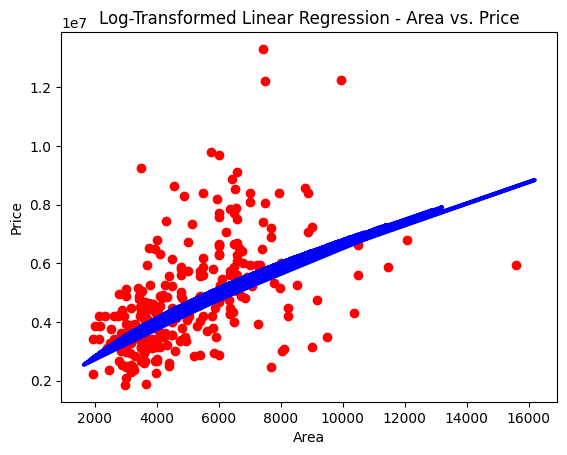

0.25049945671477364


In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
accuracy = mean_absolute_error(_y_test, _y_pred)
plt.scatter(np.exp(_X_train), np.exp(_y_train), color='red')
plt.plot(np.exp(_X_test), np.exp(_y_pred), color='blue', linewidth=3)
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Log-Transformed Linear Regression - Area vs. Price')
plt.show()
print(accuracy)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
accuracy = mean_absolute_error(np.exp(_y_test), np.exp(_y_pred))
plt.scatter(np.exp(_X_train), np.exp(_y_train), color='red')
plt.plot(np.exp(_X_test), np.exp(_y_pred), color='blue', linewidth=3)
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Log-Transformed Linear Regression - Area vs. Price')
plt.show()
print(accuracy)

## View the Run in the MLflow UI

In [16]:
#Loads into http://127.0.0.1:5000/
!mlflow ui

^C
